In [12]:
import pandas as pd
import os
from datetime import datetime

SAMPLE_RATE = 32

PARTICIPANTE = 2


ATIVIDADE = 'AVD'
MARCHA = 'D'
SEQUENCIA = 3
SENSOR = 'ACC'

HEADER_LINES = 2

print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv') 
print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv')
print('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv')

Dataset/Participante 2/V2_AVD_D_3/ACC.csv
Dataset/Participante 2/V2_AVD_D_3/tags.csv
Lifesenior/AVD_D_3/V2_AVD_D_3.csv


In [13]:
 #read file
 data = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv',index_col=False,header=None)
 data = data.rename(columns={0: 'acc_x', 1: 'acc_y', 2: 'acc_z'})
 init_time_measure = data.iloc[0,0]
 print(data)

 print(init_time_measure)

             acc_x         acc_y         acc_z
0     1.660321e+09  1.660321e+09  1.660321e+09
1     3.200000e+01  3.200000e+01  3.200000e+01
2    -2.800000e+01 -6.300000e+01  1.300000e+01
3    -2.900000e+01 -6.300000e+01  1.200000e+01
4    -2.800000e+01 -5.800000e+01  1.200000e+01
...            ...           ...           ...
2943 -2.500000e+01 -6.500000e+01  4.000000e+00
2944 -2.800000e+01 -7.500000e+01  0.000000e+00
2945 -3.200000e+01 -8.000000e+01  0.000000e+00
2946 -3.300000e+01 -7.100000e+01  2.000000e+00
2947 -3.200000e+01 -4.500000e+01  9.000000e+00

[2948 rows x 3 columns]
1660321409.0


In [14]:
#read tags that inform init and end of activity
tags = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv',index_col=False,header=None)
print(tags)
print(tags.shape)

              0
0  1.660321e+09
1  1.660321e+09
(2, 1)


In [15]:
#store init and end activity time
init_activ_time = tags.iloc[0,0]
end_activ_time = tags.iloc[1,0]
print(init_activ_time)

1660321420.84


In [16]:
#calc time to cut in file init
lines_to_cut_init = init_activ_time - init_time_measure
print(lines_to_cut_init)
lines_to_cut_init = int(lines_to_cut_init*SAMPLE_RATE)+HEADER_LINES
print(lines_to_cut_init)

11.839999914169312
380


In [17]:
#calc time to cut in file end
lines_to_cut_end = end_activ_time - init_time_measure
print(lines_to_cut_end)
lines_to_cut_end = int(lines_to_cut_end*SAMPLE_RATE)+HEADER_LINES
print(lines_to_cut_end)

86.20000004768372
2760


In [18]:
#get only samples from init to end tagged activity
formatted_data = data.iloc[lines_to_cut_init:lines_to_cut_end,:]

#transform to real values according to Empatica Calc
formatted_data = (formatted_data.values*2)/128

print(formatted_data)

newdata = pd.DataFrame(formatted_data)
newdata = newdata.rename(columns={0: 'acc_x', 1: 'acc_y', 2: 'acc_z'})

[[-0.296875 -0.8125    0.453125]
 [-0.3125   -0.828125  0.484375]
 [-0.296875 -0.796875  0.484375]
 ...
 [-0.234375 -0.765625  0.453125]
 [-0.28125  -0.796875  0.453125]
 [-0.28125  -0.796875  0.453125]]


In [19]:
print(newdata.shape)

(2380, 3)


In [20]:
print(newdata)

         acc_x     acc_y     acc_z
0    -0.296875 -0.812500  0.453125
1    -0.312500 -0.828125  0.484375
2    -0.296875 -0.796875  0.484375
3    -0.328125 -0.781250  0.500000
4    -0.250000 -0.765625  0.734375
...        ...       ...       ...
2375 -0.312500 -0.843750  0.437500
2376 -0.281250 -0.828125  0.437500
2377 -0.234375 -0.765625  0.453125
2378 -0.281250 -0.796875  0.453125
2379 -0.281250 -0.796875  0.453125

[2380 rows x 3 columns]


<Axes: >

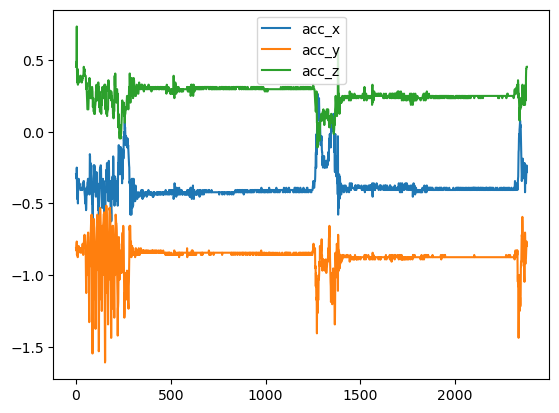

In [21]:
newdata.plot()

In [22]:
#export the file to specific activity
newdata.to_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv', index=False)